In [573]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

In [574]:
df = pd.read_csv('merge_first_second_raw_10907x23.csv')

df = df[['price','price2','bedrooms','bedrooms2','brand_new','builder','builder2','locality','property_type',
         'property_type2','furnished_status','floor','project_name','user_type','user_type2','carpet_area',
         'bathrooms','date_created','other','link','agent', 'paid_user','prop_id']]

In [575]:
df.shape

(10907, 23)

In [576]:
df['builder'].nunique() #no of unique values in the series

266

In [577]:
df['builder2'].nunique()

577

In [578]:
df['builder'].count() #no of values in the series

293

In [579]:
df['builder2'].count()

1854

In [580]:
df['builder'].fillna('No Idea',inplace=True) 

df['builder_final'] = np.where(df['builder']=='No Idea',df['builder2'],df['builder'])

In [581]:
df['builder_final'].nunique()

797

In [582]:
df['builder_final'].count()

2018

In [583]:
df['other'] = df['other'].str.replace('\t',' ')
df['other'] = df['other'].str.replace('*',' ')

<ipython-input-583-f0fbaa6909ca>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [585]:
df['ready_to_move'] = np.where(df['other'].str.contains('Ready to Move',na=False),'Yes','NaN')

In [586]:
search = []    
for value in df['other']:
    search.append(re.findall(r"Possession by \w\w\w\s'\d\d", value))
df['possession'] = search   

df['possession'] = df['possession'].apply(''.join)
df['possession']  = df['possession'].replace(r'^\s*$', np.nan, regex=True)
df['possession'] = df['possession'].str.replace(r'Possession by ','')
df['possession'] = df['possession'].str.replace(r"'",'')

In [587]:
df['move_in'] = np.where(df['ready_to_move']=='NaN',df['possession'],df['ready_to_move'])
df['move_in'] = df['move_in'].str.replace('Yes','Aug 21')
df['move_in'] = pd.to_datetime(df['move_in'],format="%b %y")

In [588]:
links_list = df['link'].tolist()
df['area_sqft'] = [x[50:54] for x in links_list]
df['area_sqft'] = df['area_sqft'].str.replace('-','')
df['area_sqft'] = df['area_sqft'].str.replace(r'[A-Za-z]+','')
df['area_sqft'] = df['area_sqft'].replace(r'^\s*$', np.nan, regex=True)

<ipython-input-588-068f5cfa41fb>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [589]:
df['date_created'] = df['date_created'].astype(int)
df['date_created'] = df['date_created'].astype(str)

def split(x):
    a = x[:4]
    b = x[4:6]
    c = x[6:]
    d = a+'-'+b+'-'+c
    return d

df['date_created2'] = [split(x) for x in df['date_created']]
df['date_created2'] = pd.to_datetime(df['date_created2'], format='%Y-%m-%d')

In [590]:
df['locality'] = df['locality'].str.replace('NH  9','')
df['locality'] = df['locality'].str.replace('NH 2 2','')
df['locality'] = df['locality'].str.replace('NH 7','')
df['locality'] = df['locality'].str.replace(', Outer Ring Road','')
df['locality'] = df['locality'].str.replace(',','')

In [591]:
df['area_sqft'] = df['area_sqft'].astype(float)
df['price_persqft'] = df['price2']/df['area_sqft']

In [592]:
#optional
#converts 'price' column from 'string' to 'float'

# df['price'] = df['price'].astype(str)

# df['lac'] = np.where(df['price'].str.contains('Lac',na=False),df['price'],'NaN')
# df['lac'] = df['lac'].str.replace('Lac','')
# df['lac'] = df['lac'].astype(float)
# df['lac'] = df['lac']*100000
# df['lac'].fillna(0,inplace=True)


# df['crore'] = np.where(df['price'].str.contains('Cr',na=False),df['price'],'NaN')
# df['crore'] = df['crore'].str.replace('Cr','')
# df['crore'] = df['crore'].astype(float)
# df['crore'] = df['crore']*10000000
# df['crore'].fillna(0,inplace=True)

# df['price_final'] = np.where(df['lac']==0,df['crore'],df['lac'])
# df['price_final'] = df['price_final'].astype(float)

In [593]:
df.drop(columns=['price','bedrooms2','builder','builder2','property_type2','user_type2','carpet_area',
                'bathrooms','date_created','agent','prop_id','ready_to_move','possession','paid_user','other',
                'link'],
       inplace=True)

df = df.rename(columns={'builder_final':'builder','date_created2':'date_posted','price2':'price'})

df = df[['price','locality','property_type','bedrooms','brand_new','furnished_status','builder',
         'project_name','user_type','floor','date_posted','move_in','area_sqft','price_persqft']]

In [594]:
df_studio1 = df[df['property_type']=='Studio Apartment'] #drops rows pertaining to 'studio apartments'
df.drop(df_studio1.index, axis=0,inplace=True)

In [595]:
df.shape

(10894, 14)

In [596]:
df_studio = pd.read_csv('merge_first_second_raw_10907x23.csv')
filt_studio = df_studio['property_type']=='Studio Apartment'
df_studio = df_studio.loc[filt_studio]

links_list = df_studio['link'].tolist()
df_studio['area_sqft'] = [x[44:47] for x in links_list]
df_studio['area_sqft'] = df_studio['area_sqft'].str.replace('-','')
df_studio['area_sqft'] = df_studio['area_sqft'].str.replace(r'[A-Za-z]+','')
df_studio['area_sqft'] = df_studio['area_sqft'].replace(r'^\s*$', np.nan, regex=True)

df_studio['builder'].fillna('No Idea',inplace=True) 
df_studio['builder_final'] = np.where(df_studio['builder']=='No Idea',df_studio['builder2'],df_studio['builder'])

df_studio['other'] = df_studio['other'].str.replace('\t',' ')
df_studio['other'] = df_studio['other'].str.replace('*',' ')

df_studio['ready_to_move'] = np.where(df_studio['other'].str.contains('Ready to Move',na=False),'Yes','NaN')

search = []    
for value in df_studio['other']:
    search.append(re.findall(r"Possession by \w\w\w\s'\d\d", value))
df_studio['possession'] = search   

df_studio['possession'] = df_studio['possession'].apply(''.join)
df_studio['possession']  = df_studio['possession'].replace(r'^\s*$', np.nan, regex=True)
df_studio['possession'] = df_studio['possession'].str.replace(r'Possession by ','')
df_studio['possession'] = df_studio['possession'].str.replace(r"'",'')

df_studio['move_in'] = np.where(df_studio['ready_to_move']=='NaN',df_studio['possession'],df_studio['ready_to_move'])
df_studio['move_in'] = df_studio['move_in'].str.replace('Yes','Aug 21')
df_studio['move_in'] = pd.to_datetime(df_studio['move_in'],format="%b %y")

df_studio['date_created'] = df_studio['date_created'].astype(int)
df_studio['date_created'] = df_studio['date_created'].astype(str)
def split(x):
    a = x[:4]
    b = x[4:6]
    c = x[6:]
    d = a+'-'+b+'-'+c
    return d
df_studio['date_created2'] = [split(x) for x in df_studio['date_created']]
df_studio['date_created2'] = pd.to_datetime(df_studio['date_created2'], format='%Y-%m-%d')

df_studio['locality'] = df_studio['locality'].str.replace('NH  9','')
df_studio['locality'] = df_studio['locality'].str.replace('NH 2 2','')
df_studio['locality'] = df_studio['locality'].str.replace('NH 7','')
df_studio['locality'] = df_studio['locality'].str.replace(', Outer Ring Road','')
df_studio['locality'] = df_studio['locality'].str.replace(',','')

df_studio['area_sqft'] = df_studio['area_sqft'].astype(float)
df_studio['price_persqft'] = df_studio['price2']/df_studio['area_sqft']

df_studio.drop(columns=['price','bedrooms2','builder','builder2','property_type2','user_type2','carpet_area',
                'bathrooms','date_created','agent','prop_id','ready_to_move','possession','paid_user','other',
                'link'],
       inplace=True)

df_studio = df_studio.rename(columns={'builder_final':'builder','date_created2':'date_posted','price2':'price'})

df_studio = df_studio[['price','locality','property_type','bedrooms','brand_new','furnished_status','builder',
         'project_name','user_type','floor','date_posted','move_in','area_sqft','price_persqft']]

<ipython-input-596-e2b610096b0e>:8: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-596-e2b610096b0e>:15: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [597]:
df_studio.head()

,price,locality,property_type,bedrooms,brand_new,furnished_status,builder,project_name,user_type,floor,date_posted,move_in,area_sqft,price_persqft
106,4500000.0,Kollur,Studio Apartment,NaN,Resale,Unfurnished,NaN,NaN,Owner,18,2021-08-18,2024-12-01,160.0,28125.000000
110,1850000.0,Yadagirigutta,Studio Apartment,NaN,Resale,Furnished,NaN,NaN,Owner,5,2021-08-12,2021-08-01,450.0,4111.111111
263,9000000.0,Malakpet,Studio Apartment,NaN,Resale,Unfurnished,NaN,NaN,Owner,Ground,2021-06-29,2021-08-01,500.0,18000.000000
705,1900000.0,Yadagirigutta,Studio Apartment,NaN,New Property,Unfurnished,NaN,NaN,Agent,Upper Basement,2021-08-18,2023-05-01,450.0,4222.222222
4424,2700000.0,Yadagirigutta,Studio Apartment,NaN,Resale,Unfurnished,Visishta Infra Developers,Yadadri Avenue,Owner,Ground,2021-08-09,2021-09-01,800.0,3375.000000


In [598]:
frames = [df,df_studio] 
df = pd.concat(frames) #concatenates df and df_studio after extracting area values of the latter

In [599]:
df.shape

(10907, 14)

In [600]:
locations = df['locality'].value_counts()
locations = dict(locations)

fig = go.Figure()


fig = px.bar(y= list(locations.keys())[0:20],x=list(locations.values())[0:20],
             text=list(locations.values())[0:20],
             orientation='h',
             color=list(locations.values())[0:20],
             color_continuous_scale = 'Turbo'

            ) 

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Top 20 locations by Listings Count</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [603]:
df['locality'].nunique()

1085

In [604]:
df['locality'].count()

10162

In [546]:
builders = df['builder'].value_counts()
builders = dict(builders)

fig = go.Figure()
            
fig = px.bar(y= list(builders.keys())[0:20],x=list(builders.values())[0:20],
             text=list(builders.values())[0:20],
             orientation='h',
             color=list(builders.values())[0:20],
             color_continuous_scale = px.colors.sequential.Viridis

            ) 

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Top 20 Builders by Listings Count</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Builder',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [545]:
projects = df['project_name'].value_counts()
projects = dict(projects)

fig = go.Figure()

fig = px.bar(y= list(projects.keys())[0:20],x=list(projects.values())[0:20],
             text=list(projects.values())[0:20],
             orientation='h',
             color=list(projects.values())[0:20]
            )

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Top 20 Projects by Listings Count</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Project',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [606]:
df['project_name'].count()

2520

In [607]:
df['project_name'].nunique()

1342

In [498]:
import plotly.express as px

filt = (df['brand_new']=='New Property')
df2 = df.loc[filt]

possession_time = []

for i in range(2021,2027):
    filt = (df['move_in'].dt.year==i)
    df_new = df2.loc[filt]
    a = df_new.shape[0]
    possession_time.append(a)
    
list(map(int,possession_time))  

possession_names = ['Ready to Move','2022','2023','2024','2025','2026']

fig = px.pie(values=possession_time, names=possession_names)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>Time of Possession (New Properties)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [608]:
df2['move_in'].count()

1217

In [497]:
import plotly.express as px

filt = (df['brand_new']=='Resale')
df3 = df.loc[filt]

possession_time = []

for i in range(2021,2027):
    filt = (df['move_in'].dt.year==i)
    df_new = df3.loc[filt]
    a = df_new.shape[0]
    possession_time.append(a)
    
list(map(int,possession_time))  

possession_names = ['Ready to Move','2022','2023','2024','2025','2026']

fig = px.pie(values=possession_time, names=possession_names)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>Time of Possession (Resale Properties)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [609]:
df3['move_in'].count()

8829

In [486]:
furnished = df['furnished_status'].value_counts()
furnished = dict(furnished)

fig = px.pie(values=list(furnished.values()), names=list(furnished.keys()), hole=0.3,
            color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>Furnished Status</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.45,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [610]:
df['furnished_status'].count()

10422

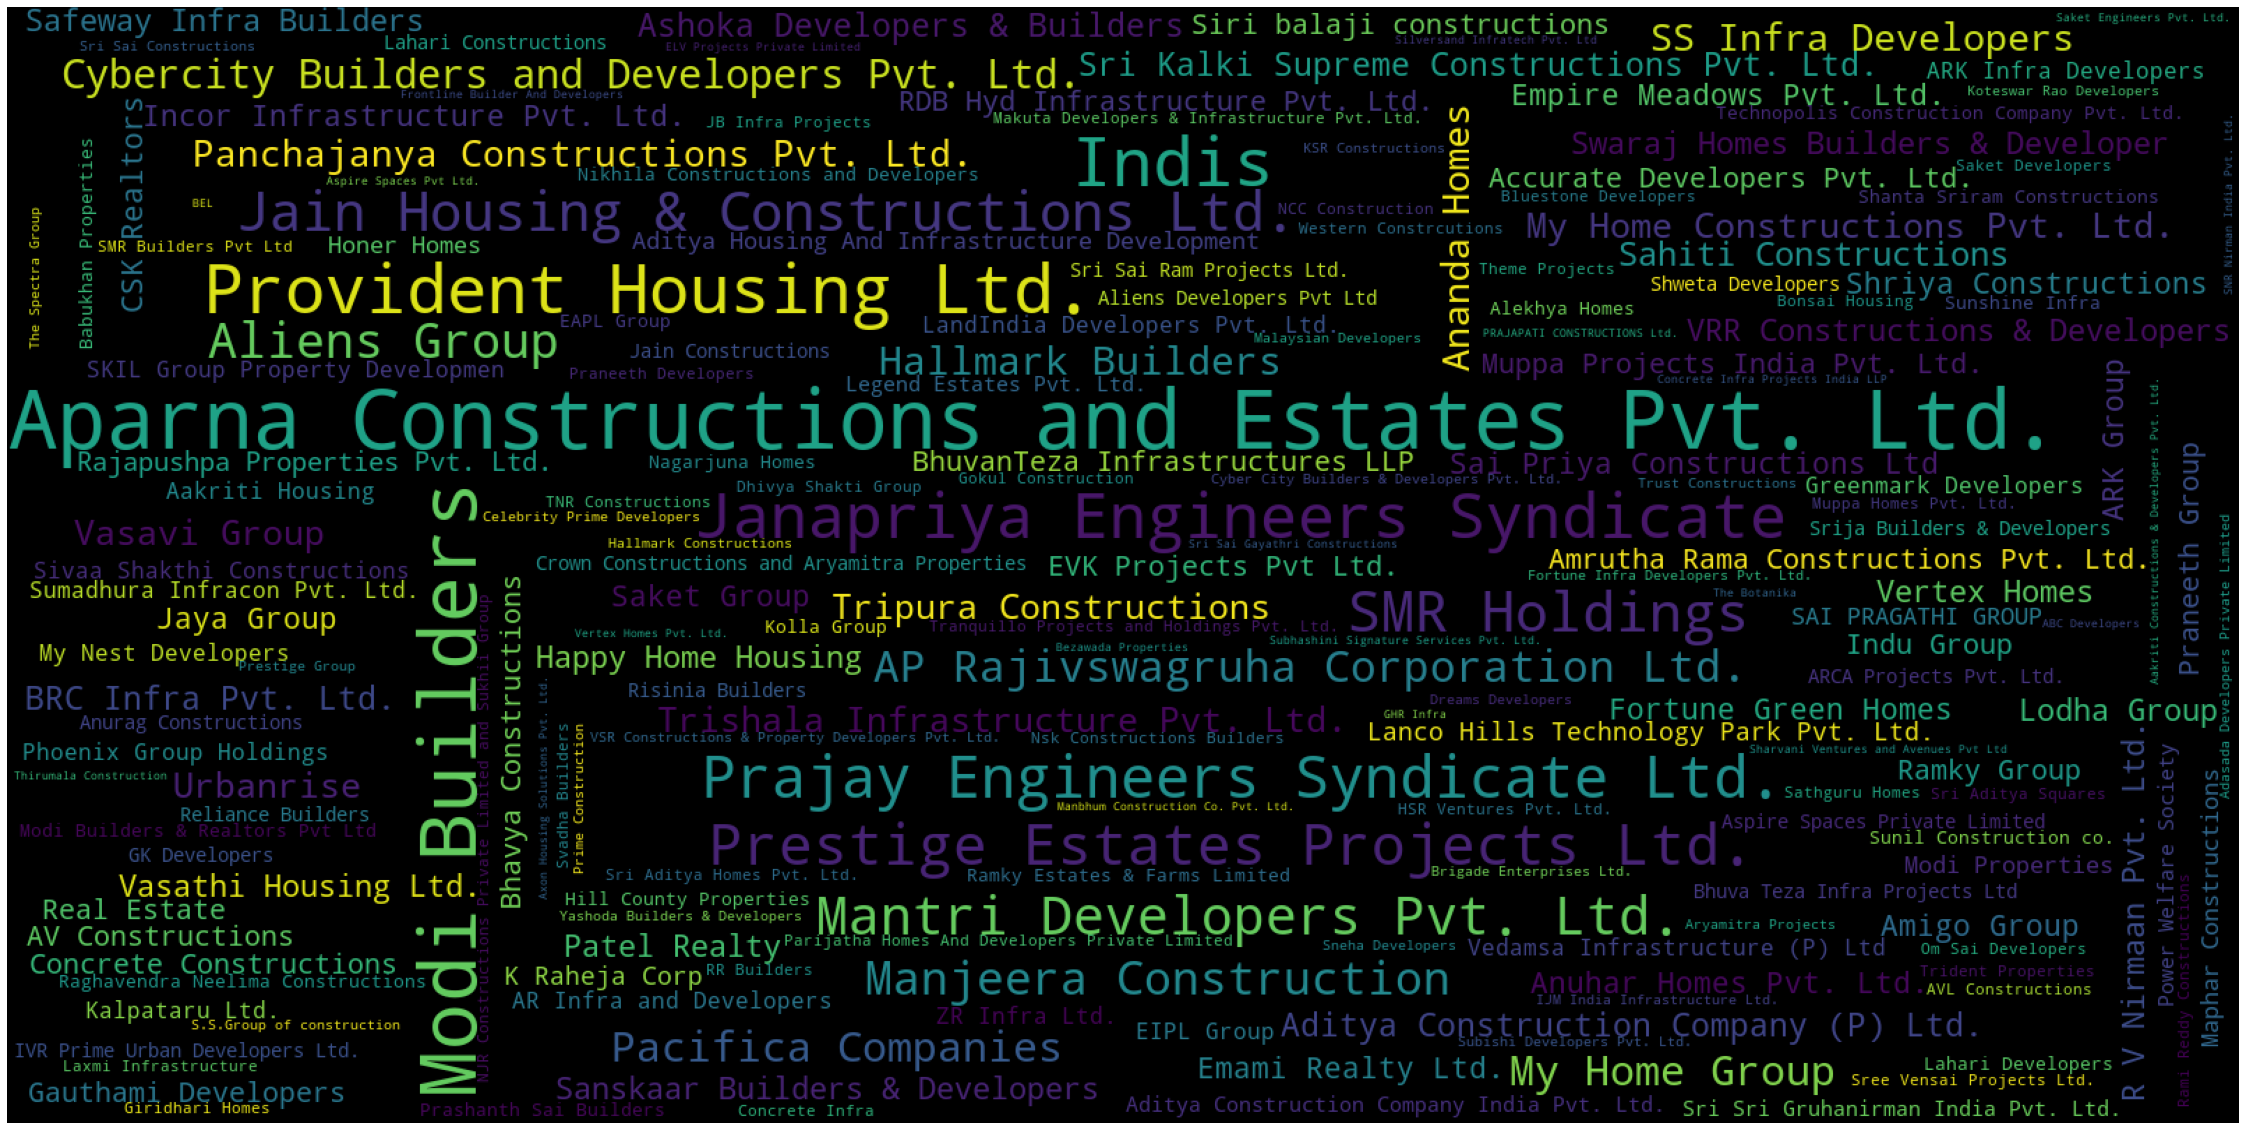

In [334]:
df['builder'] = df['builder'].replace(np.nan,'',regex=True)
builder_list = df['builder'].values.tolist()

count = Counter(builder_list)
wordcloud = WordCloud(width = 1600, height = 800)\
.generate_from_frequencies(count)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

In [485]:
prop = df['property_type'].value_counts()
prop = dict(prop)

fig = px.pie(values=list(prop.values()), names=list(prop.keys()), hole=0.3,
            color_discrete_sequence=px.colors.sequential.Hot)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>Property Type</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.45,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [611]:
df['property_type'].count()

10907

In [336]:
floor = df['floor'].value_counts()
floor = dict(floor)

fig = go.Figure()

fig.add_trace(go.Bar(
    y= list(floor.keys())[0:20],
    x= list(floor.values())[0:20],
    orientation='h',
    marker_color='RoyalBlue',
    text=list(floor.values())[0:20])
             )


fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Top 20 Floors by Count</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Floor Number',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [612]:
df['floor'].count()

9212

In [502]:
users = df['user_type'].value_counts()
users = dict(users)

fig = px.pie(values=list(users.values()), names=list(users.keys()), hole=0.3,
            color_discrete_sequence=px.colors.sequential.Bluered)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>User Type</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.45,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [613]:
df['user_type'].count()

10907

In [338]:
df.to_csv('hyderabad_realestate.csv',index=False) #saving this file to use in part 5

In [372]:
filt1 = (df['brand_new'] == 'New Property')
df1 = df.loc[filt1]

prop_grp1 = df1.groupby('property_type')
prop_pricesqft1 = prop_grp1['price_persqft'].median().tolist()
prop_pricesqft1 = [int(i) for i in prop_pricesqft1]

prop_price1 = prop_grp1['price'].median().tolist()
prop_price1 = [int(i) for i in prop_price1]

In [373]:
prop_pricesqft1

[4958, 4912, 4081, 7091, 4222, 5497]

In [374]:
prop_price1

[6318000, 6000000, 5225000, 7800000, 1900000, 11000000]

In [375]:
filt2 = (df['brand_new'] == 'Resale')
df2 = df.loc[filt2]

prop_grp2 = df2.groupby('property_type')
prop_pricesqft2 = prop_grp2['price_persqft'].median().tolist()
prop_pricesqft2 = [int(i) for i in prop_pricesqft2]

prop_price2 = prop_grp2['price'].median().tolist()
prop_price2 = [int(i) for i in prop_price2]

In [376]:
prop_pricesqft2

[4854, 4426, 3809, 8927, 6870, 6123]

In [377]:
prop_price2

[5800000, 5000000, 5500000, 7800000, 2000000, 9500000]

In [446]:
prop_types =['Apartment', 'Builder Floor Apartment', 'Penthouse','Residential House', 'Studio Apartment','Villa']

fig = go.Figure(data=[
    go.Bar(name='New Property', x=prop_types, y=prop_pricesqft1,text=prop_pricesqft1),
    go.Bar(name='Resale', x=prop_types, y=prop_pricesqft2,text=prop_pricesqft2)
])
fig.update_layout(barmode='group')

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Median Price/sqft (by Property Type)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.47,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Property Type',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Price (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)
fig.show()

In [614]:
df['price_persqft'].count()

10374

In [448]:
fig = go.Figure(data=[
    go.Bar(name='New Property', x=prop_types, y=prop_price1,text=prop_price1),
    go.Bar(name='Resale', x=prop_types, y=prop_price2,text=prop_price2)
])
fig.update_layout(barmode='group')

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Median Price (by Property Type)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.47,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Property Type',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Price (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)
fig.show()


In [615]:
df['price'].count()

10413

In [625]:
furnish_grp = df.groupby('furnished_status')
furnish_vals = furnish_grp['price_persqft'].median()

furnish_vals = dict(furnish_vals)

for key in furnish_vals:
    furnish_vals[key] = int(furnish_vals[key])

fig = go.Figure()

fig.add_trace(go.Bar(
    x= list(furnish_vals.keys()),
    y= list(furnish_vals.values()),
    name='Average Price per Sqft',
    marker_color=['green','white','red'],
    text=list(furnish_vals.values()))
             )

fig.update_traces(textposition='outside')

fig.update_layout(title_text="<b>Median Price/sqft (by Furnished Status)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

fig.update_xaxes(
        color='teal',
        title_text='Furnished Status',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickmode='auto',
        nticks=48,
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Price/sqft (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        linecolor='red',
        linewidth=3,
        mirror = True) 

In [419]:
median_list = []

for i in range(4,9):
    filt = (df['date_posted'].dt.month==i)
    df_new = df.loc[filt]
    median_list.append(df_new['price_persqft'].median())

median_list = list(map(int,median_list))    

median_names = ["April '21", "May '21", "June '21", "July '21", "August '21"]

fig = go.Figure()

fig.add_trace(go.Bar(
    x= mean_names,
    y= mean_list,
    name='Average Price per Sqft',
    marker_color='RoyalBlue',
    text=mean_list)
             )

fig.update_traces(textposition='outside')

fig.update_layout(title_text="<b>Median Price/sqft (by Month)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

fig.update_xaxes(
        color='teal',
        title_text='Month',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickmode='auto',
        nticks=48,
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Price/sqft (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        linecolor='red',
        linewidth=3,
        mirror = True) 

In [387]:
loc_grp = df.groupby('locality')
# loc_grp['price_persqft'].median().sort_values(ascending=False)[0:20]

In [388]:
df['loc_count'] = loc_grp['locality'].transform('count')

In [389]:
df.head()

,price,locality,property_type,bedrooms,brand_new,furnished_status,builder,project_name,user_type,floor,date_posted,move_in,area_sqft,price_persqft,loc_count
0,4927000.0,Adibatla,Apartment,2,New Property,Unfurnished,ELV Projects Private Limited,ELV Cosmopolis,Builder,NaN,2021-08-11,NaT,1285.0,3834.241245,31.0
1,7988400.0,Manikonda,Apartment,2,New Property,Unfurnished,AR Infra and Developers,AR The Nest,Builder,NaN,2021-08-17,2021-08-01,1268.0,6300.000000,253.0
2,8625000.0,Hitech City,Apartment,2,New Property,Unfurnished,Silversand Infratech Pvt. Ltd,Silversand Cyberdyne 2,Builder,NaN,2021-07-30,2021-08-01,1150.0,7500.000000,41.0
3,4085000.0,Aminpur,Apartment,2,New Property,Unfurnished,Urbanrise,Spring Is In The Air,Builder,NaN,2021-07-23,2023-01-01,918.0,4449.891068,74.0
4,13549250.0,Shaikpet,Apartment,3,New Property,Unfurnished,Sri Aditya Homes Pvt. Ltd.,Aditya Athena,Builder,NaN,2021-08-10,2022-12-01,1895.0,7150.000000,33.0


In [390]:
# loc_grpn['price_persqft'].mean().sort_values(ascending=False)[0:100]

In [391]:
filtn = (df['price_persqft']<10000) & (df['loc_count']>=10)
dfn = df.loc[filtn]

loc_grpn = dfn.groupby('locality')

In [392]:
median_vals = loc_grpn['price_persqft'].median().sort_values(ascending=False)

In [393]:
median_dict = dict(median_vals)

In [394]:
for key in median_dict:
    median_dict[key] = int(median_dict[key])

In [628]:
fig = go.Figure()

fig = px.bar(y=list(median_dict.keys())[0:20],x=list(median_dict.values())[0:20],
             text=list(median_dict.values())[0:20],
             orientation='h'
            )             

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Most Expensive Locations (by Medium Price/sqft)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Price/sqft (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [396]:
median_vals_asc = loc_grpn['price_persqft'].median().sort_values(ascending=True)

median_dict_asc = dict(median_vals_asc)

for key in median_dict_asc:
    median_dict_asc[key] = int(median_dict_asc[key])

In [631]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y= list(median_dict_asc.keys())[0:20],
    x= list(median_dict_asc.values())[0:20],
    orientation='h',
    marker_color='red',
    text=list(median_dict_asc.values())[0:20])
             )


fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Least Expensive Locations (by Median Price/sqft)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Price/sqft (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='blue',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='blue',
        linewidth=3,
        mirror = True)
fig.update_layout(barmode='group', yaxis={'categoryorder':'total descending'})



In [622]:
df['brand_new'].value_counts()

Resale          9614
New Property    1281
Rent               1
Name: brand_new, dtype: int64

In [624]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x= ['Resale','New Property'],
    y= [9614,1281],
    marker_color=['crimson','blue'],
    text= [9614,1281]
             ))

fig.update_traces(textposition='outside')

fig.update_layout(title_text="<b>New vs Resale Listings</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

fig.update_xaxes(
        color='teal',
        title_text='Type',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickmode='auto',
        nticks=48,
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Count',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        linecolor='red',
        linewidth=3,
        mirror = True) 